In [1]:
# Import necessary libraries

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures

from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV


from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB

from sklearn.metrics import auc
from sklearn.metrics import confusion_matrix
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report

warnings.filterwarnings("ignore") 

C:\Users\james\anaconda3\lib\site-packages\numpy\_distributor_init.py:30: UserWarning: loaded more than 1 DLL from .libs:
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.PYQHXLVVQ7VESDPUVUADXEVJOBGHJPAY.gfortran-win_amd64.dll
C:\Users\james\anaconda3\lib\site-packages\numpy\.libs\libopenblas.WCDJNK7YVMPZQ2ME2ZZHJJRJ3JIKNDB7.gfortran-win_amd64.dll
  warnings.warn("loaded more than 1 DLL from .libs:"


In [2]:
data = pd.read_csv('data.csv')

## EDA

In [3]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6819 entries, 0 to 6818
Data columns (total 96 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   Bankrupt?                                                 6819 non-null   int64  
 1    ROA(C) before interest and depreciation before interest  6819 non-null   float64
 2    ROA(A) before interest and % after tax                   6819 non-null   float64
 3    ROA(B) before interest and depreciation after tax        6819 non-null   float64
 4    Operating Gross Margin                                   6819 non-null   float64
 5    Realized Sales Gross Margin                              6819 non-null   float64
 6    Operating Profit Rate                                    6819 non-null   float64
 7    Pre-tax net Interest Rate                                6819 non-null   float64
 8    After-tax net Int

In [4]:
data.head()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
0,1,0.370594,0.424389,0.405750,0.601457,0.601457,0.998969,0.796887,0.808809,0.302646,...,0.716845,0.009219,0.622879,0.601453,0.827890,0.290202,0.026601,0.564050,1,0.016469
1,1,0.464291,0.538214,0.516730,0.610235,0.610235,0.998946,0.797380,0.809301,0.303556,...,0.795297,0.008323,0.623652,0.610237,0.839969,0.283846,0.264577,0.570175,1,0.020794
2,1,0.426071,0.499019,0.472295,0.601450,0.601364,0.998857,0.796403,0.808388,0.302035,...,0.774670,0.040003,0.623841,0.601449,0.836774,0.290189,0.026555,0.563706,1,0.016474
3,1,0.399844,0.451265,0.457733,0.583541,0.583541,0.998700,0.796967,0.808966,0.303350,...,0.739555,0.003252,0.622929,0.583538,0.834697,0.281721,0.026697,0.564663,1,0.023982
4,1,0.465022,0.538432,0.522298,0.598783,0.598783,0.998973,0.797366,0.809304,0.303475,...,0.795016,0.003878,0.623521,0.598782,0.839973,0.278514,0.024752,0.575617,1,0.035490


In [5]:
data.describe()

,Bankrupt?,ROA(C) before interest and depreciation before interest,ROA(A) before interest and % after tax,ROA(B) before interest and depreciation after tax,Operating Gross Margin,Realized Sales Gross Margin,Operating Profit Rate,Pre-tax net Interest Rate,After-tax net Interest Rate,Non-industry income and expenditure/revenue,...,Net Income to Total Assets,Total assets to GNP price,No-credit Interval,Gross Profit to Sales,Net Income to Stockholder's Equity,Liability to Equity,Degree of Financial Leverage (DFL),Interest Coverage Ratio (Interest expense to EBIT),Net Income Flag,Equity to Liability
count,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,...,6819.000000,6.819000e+03,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.000000,6819.0,6819.000000
mean,0.032263,0.505180,0.558625,0.553589,0.607948,0.607929,0.998755,0.797190,0.809084,0.303623,...,0.807760,1.862942e+07,0.623915,0.607946,0.840402,0.280365,0.027541,0.565358,1.0,0.047578
std,0.176710,0.060686,0.065620,0.061595,0.016934,0.016916,0.013010,0.012869,0.013601,0.011163,...,0.040332,3.764501e+08,0.012290,0.016934,0.014523,0.014463,0.015668,0.013214,0.0,0.050014
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.0,0.000000
25%,0.000000,0.476527,0.535543,0.527277,0.600445,0.600434,0.998969,0.797386,0.809312,0.303466,...,0.796750,9.036205e-04,0.623636,0.600443,0.840115,0.276944,0.026791,0.565158,1.0,0.024477
50%,0.000000,0.502706,0.559802,0.552278,0.605997,0.605976,0.999022,0.797464,0.809375,0.303525,...,0.810619,2.085213e-03,0.623879,0.605998,0.841179,0.278778,0.026808,0.565252,1.0,0.033798
75%,0.000000,0.535563,0.589157,0.584105,0.613914,0.613842,0.999095,0.797579,0.809469,0.303585,...,0.826455,5.269777e-03,0.624168,0.613913,0.842357,0.281449,0.026913,0.565725,1.0,0.052838
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,9.820000e+09,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.0,1.000000


In [6]:
# Create copy of df
df = data.copy()
# Check Missing data
df.isnull().sum().any()

False

In [7]:
# Shape of df
df.shape

(6819, 96)

In [8]:
df['Bankrupt?'].value_counts()
#only 220 of the 6819 companies are bankrupt

0    6599
1     220
Name: Bankrupt?, dtype: int64

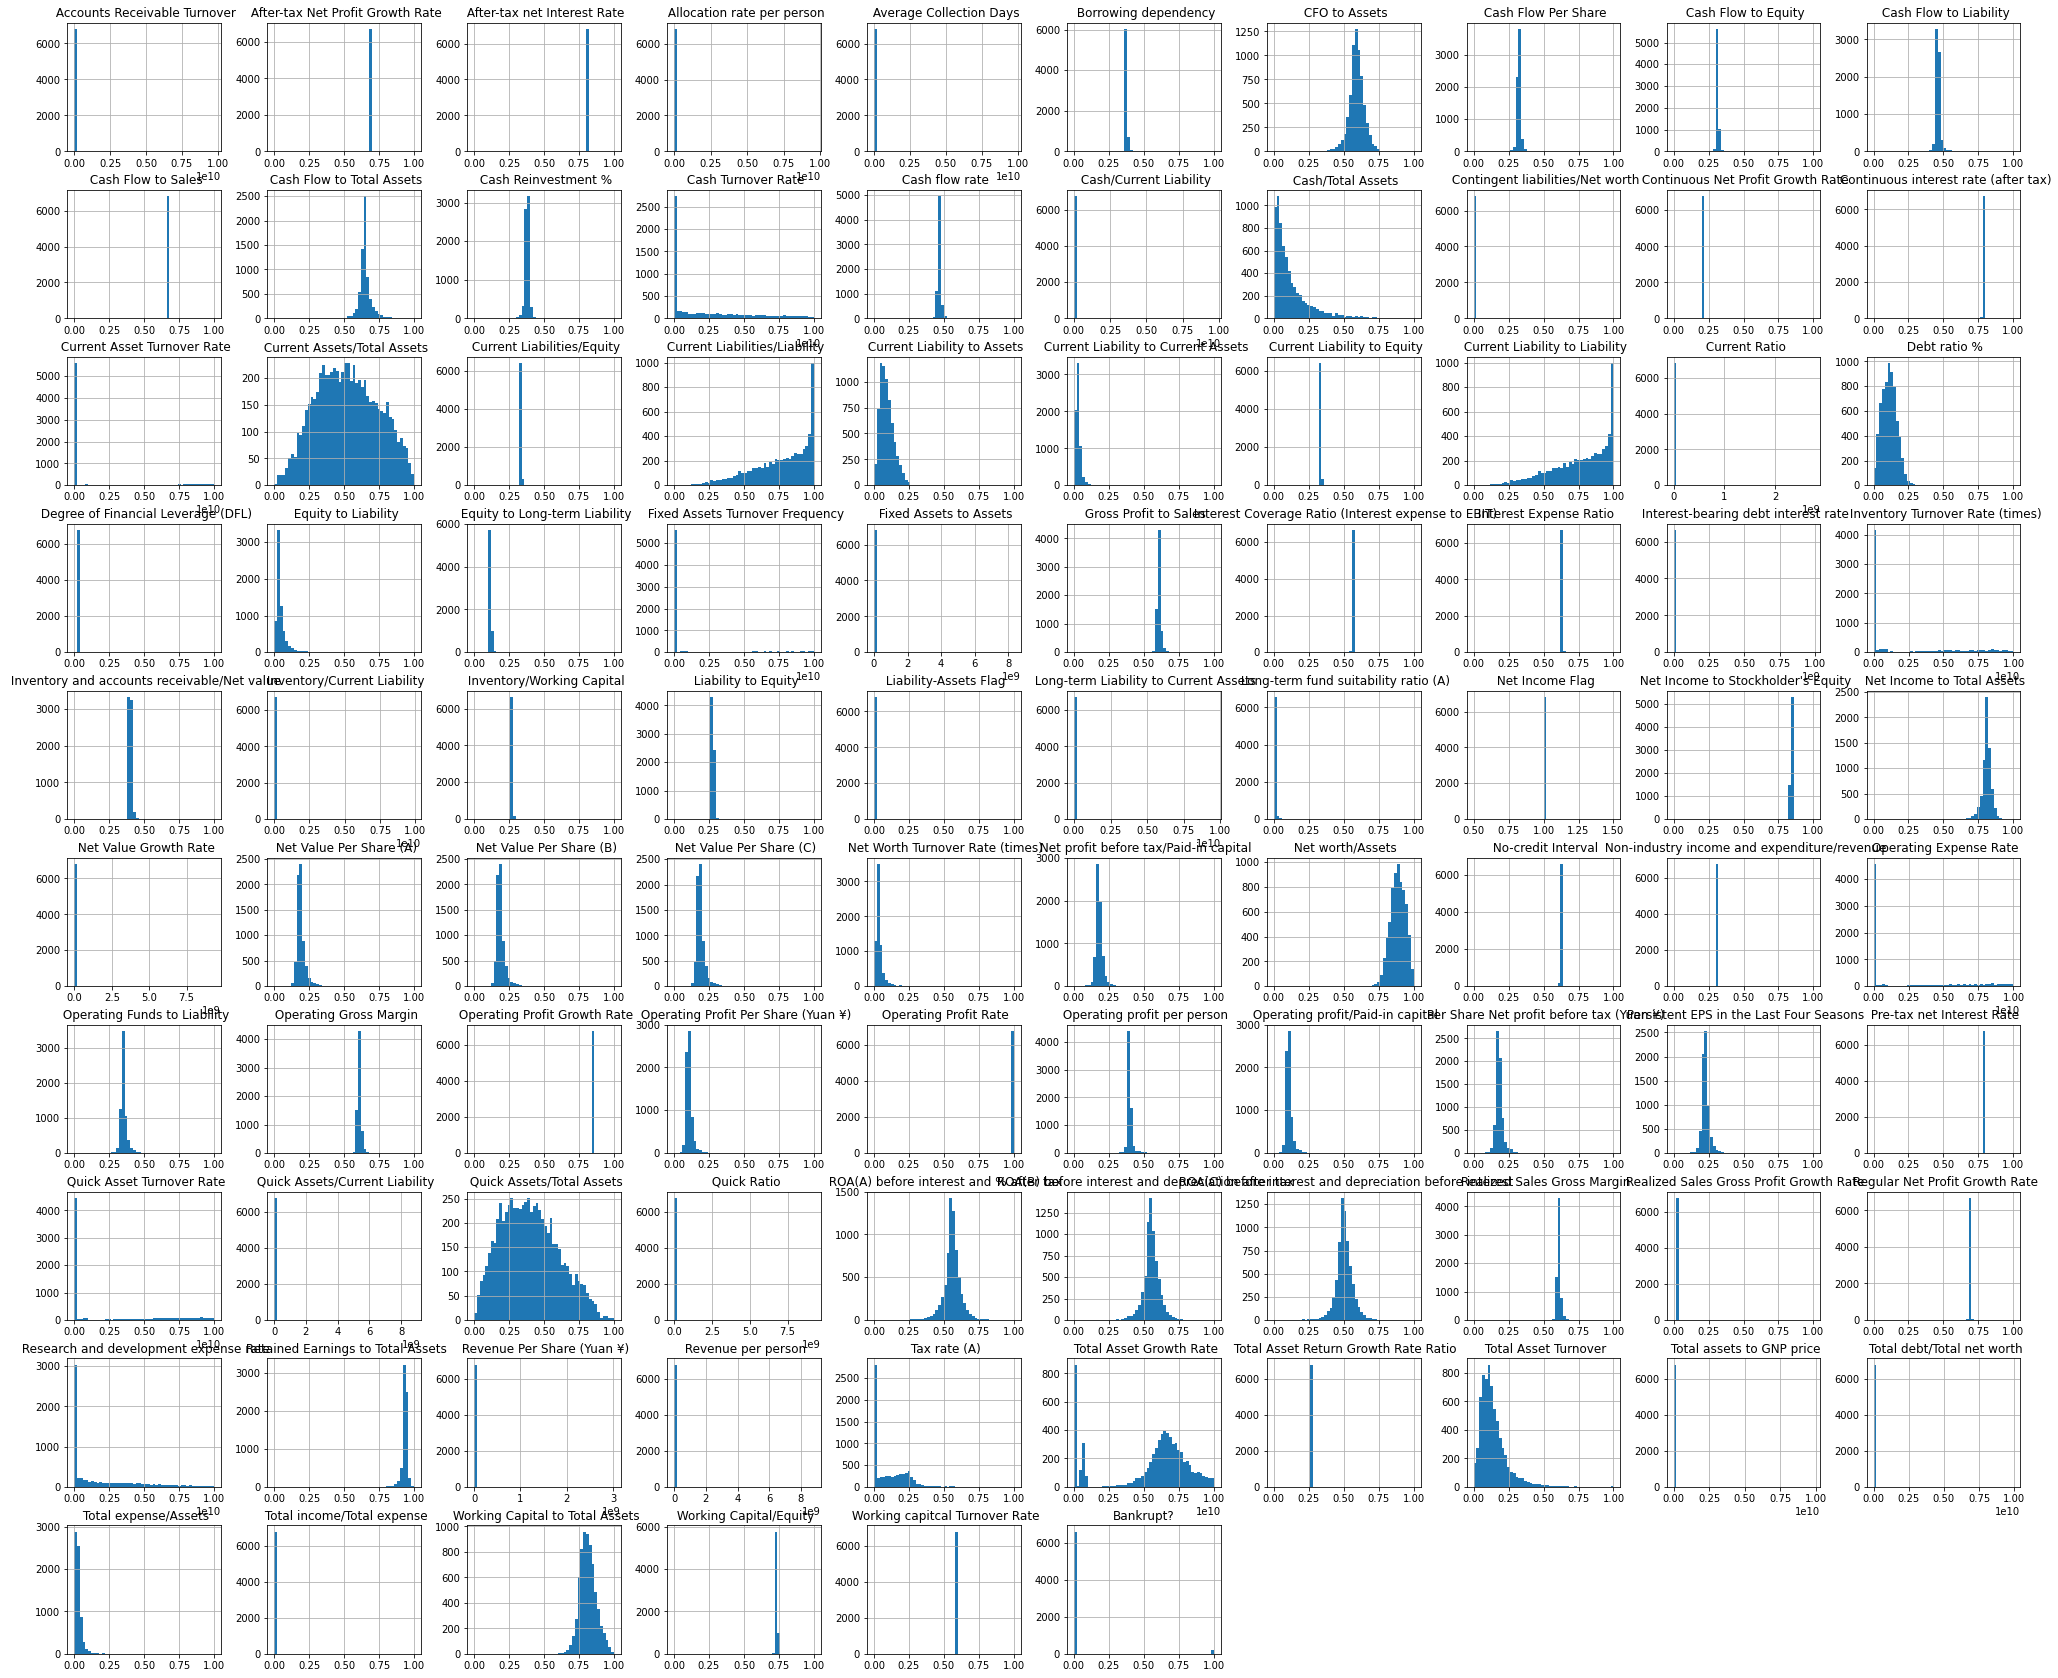

In [9]:
# Looking at the histograms of numerical data
data.hist(figsize = (35,30), bins = 50)
plt.show()

#### The data in the set is fairly clean. There are no missing values. The data is already set in a numerical format. Most features are normally distributed. Few have a significant skew.

## Data Processing

In [10]:
X = df.drop('Bankrupt?', axis = 1)
y = df['Bankrupt?']

In [11]:
poly = PolynomialFeatures()
poly.fit_transform(X)

array([[1.00000000e+00, 3.70594257e-01, 4.24389446e-01, ...,
        1.00000000e+00, 1.64687409e-02, 2.71219427e-04],
       [1.00000000e+00, 4.64290937e-01, 5.38214130e-01, ...,
        1.00000000e+00, 2.07943063e-02, 4.32403176e-04],
       [1.00000000e+00, 4.26071272e-01, 4.99018753e-01, ...,
        1.00000000e+00, 1.64741143e-02, 2.71396443e-04],
       ...,
       [1.00000000e+00, 4.72724614e-01, 5.33744003e-01, ...,
        1.00000000e+00, 9.76487375e-02, 9.53527593e-03],
       [1.00000000e+00, 5.06264320e-01, 5.59910597e-01, ...,
        1.00000000e+00, 4.40094472e-02, 1.93683144e-03],
       [1.00000000e+00, 4.93053186e-01, 5.70104666e-01, ...,
        1.00000000e+00, 2.33902238e-01, 5.47102569e-02]])

## Feature Selection

In [12]:
#Sort columns from the less correlated to the most correlated
df_corr = df.corr()
df_corr = df_corr.reindex(df_corr["Bankrupt?"].abs().sort_values(ascending=True).index).T
column_names = np.array(df_corr.columns)
df= df.reindex(columns=column_names)

<AxesSubplot:>

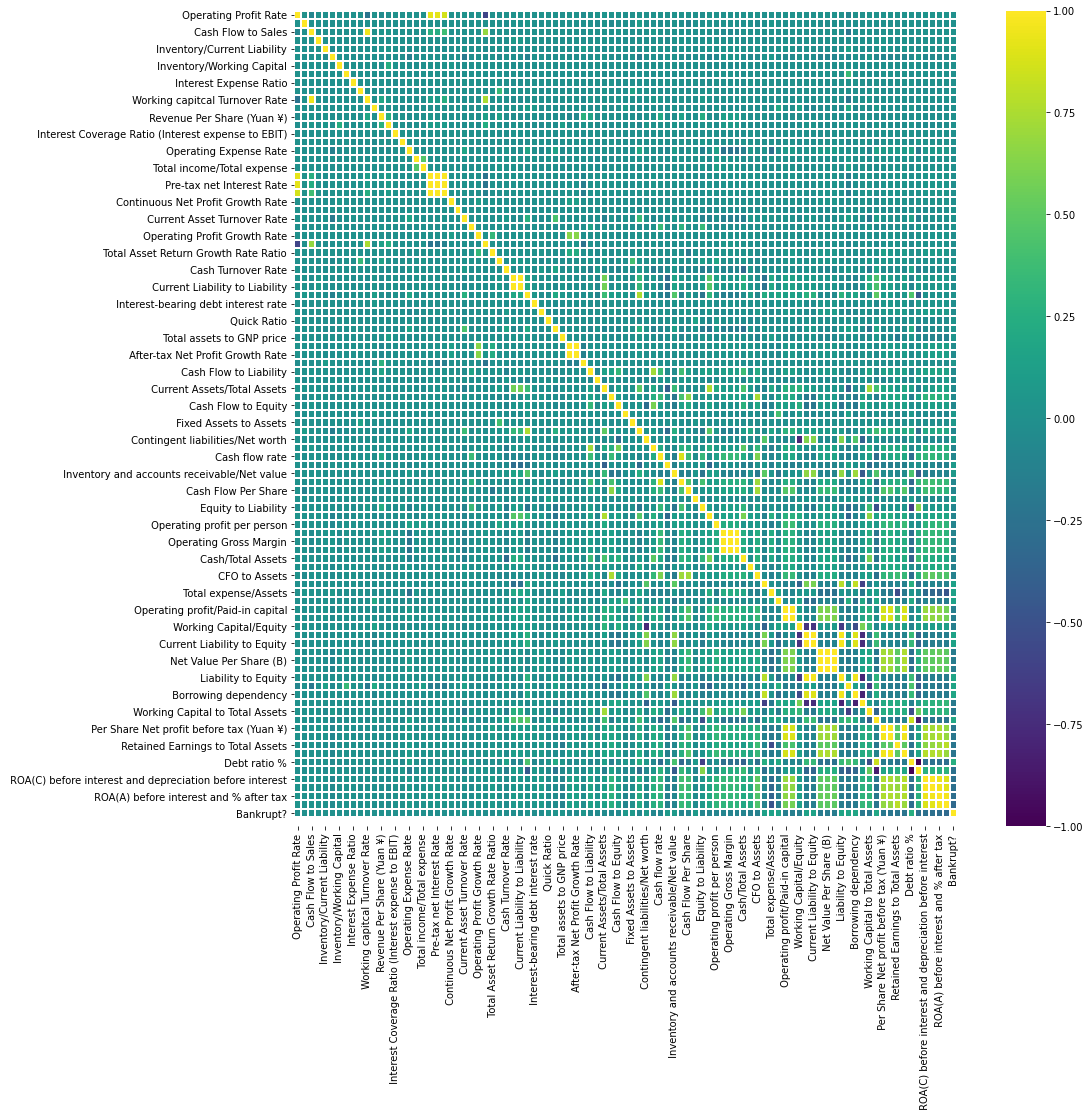

In [13]:
corr = df.corr()
fig, ax = plt.subplots(figsize = (15,15))
sns.heatmap(corr, ax = ax, cmap = 'viridis', linewidth = 0.1)

In [14]:
#Isolate the input features which have a high correlation between themselves
def correlation(dataset, threshold):
    col_corr = set() 
    corr_matrix = data.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: 
                colname = corr_matrix.columns[i]  
                col_corr.add(colname)
    return col_corr
corr_features = correlation(X, 0.65)
display(len(corr_features))

35

In [15]:
X.drop(corr_features, axis=1, inplace=True)
df.drop(corr_features,axis=1, inplace=True)
df.head()

,Operating Profit Rate,Realized Sales Gross Profit Growth Rate,Long-term Liability to Current Assets,Inventory/Current Liability,Inventory Turnover Rate (times),Inventory/Working Capital,Current Ratio,Interest Expense Ratio,Allocation rate per person,Quick Assets/Current Liability,...,Total expense/Assets,Liability-Assets Flag,Net Value Per Share (B),Current Liability to Current Assets,Borrowing dependency,Working Capital to Total Assets,Debt ratio %,ROA(C) before interest and depreciation before interest,Bankrupt?,Net Income Flag
0,0.998969,0.022102,0.025592,0.001036,1.820926e-04,0.276920,0.002259,0.629951,0.037135,0.001997,...,0.064856,0,0.147950,0.118250,0.390284,0.672775,0.207576,0.370594,1,1
1,0.998946,0.022080,0.023947,0.005210,9.360000e+09,0.289642,0.006016,0.635172,0.012335,0.004136,...,0.025516,0,0.182251,0.047775,0.376760,0.751111,0.171176,0.464291,1,1
2,0.998857,0.022760,0.003715,0.013879,6.500000e+07,0.277456,0.011543,0.629631,0.141016,0.006302,...,0.021387,0,0.177911,0.025346,0.379093,0.829502,0.207516,0.426071,1,1
3,0.998700,0.022046,0.022165,0.003540,7.130000e+09,0.276580,0.004194,0.630228,0.021320,0.002961,...,0.024161,0,0.154187,0.067250,0.379743,0.725754,0.151465,0.399844,1,1
4,0.998973,0.022096,0.000000,0.004869,1.633674e-04,0.287913,0.006022,0.636055,0.023988,0.004275,...,0.026385,0,0.167502,0.047725,0.375025,0.751822,0.106509,0.465022,1,1


# Scaling

In [16]:
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Modeling

In [17]:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=101)

In [18]:
#load models 
lr = LogisticRegression(max_iter = 2000)
GNB = GaussianNB()
SVM = SVC(probability = True)

In [19]:
#fit models
lr.fit(X_train, y_train)
GNB.fit(X_train, y_train)
SVM.fit(X_train, y_train)

SVC(probability=True)

In [20]:
#Create random classifier line for ROC and precision/recall curves
rnd_probs = [0 for _ in range(len(y_train))]
# calculate scores
rnd_auc = roc_auc_score(y_train, rnd_probs)
# calculate roc curves
rnd_fpr, rnd_tpr, _ = roc_curve(y_train, rnd_probs)
# calculate the random classifier line as the proportion of the positive class
rnd = len(y_train[y_train==1]) / len(y_train)

# Logistic Regression

In [21]:
cv = cross_val_score(lr,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.95970696 0.96703297 0.96153846 0.97435897 0.96886447 0.9706422
 0.95779817 0.96697248 0.9706422  0.96697248]
0.966452935443761


In [22]:
# predict probabilities for logistic regression
lr_probs = lr.predict_proba(X_train)
# keep probabilities for the positive outcome only
lr_probs = lr_probs[:,1]
# calculate scores
lr_auc = roc_auc_score(y_train, lr_probs)
lr_fpr, lr_tpr, _ = roc_curve(y_train, lr_probs)

Random Classifier: ROC AUC=0.500
Logistic Regression: ROC AUC=0.940


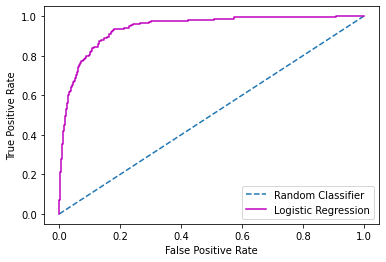

In [23]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Logistic Regression: ROC AUC=%.3f' % (lr_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(lr_fpr, lr_tpr, marker='', label='Logistic Regression', color = 'm')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

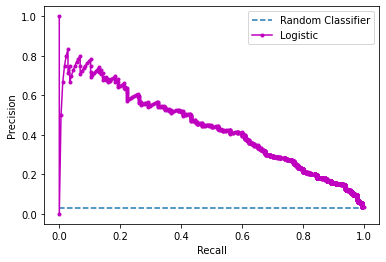

Logistic Regression: PR AUC=0.434


In [24]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, lr_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Logistic', color = 'm')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
lr_pr_score = auc(recall, precision)
print('Logistic Regression: PR AUC=%.3f' % (lr_pr_score))

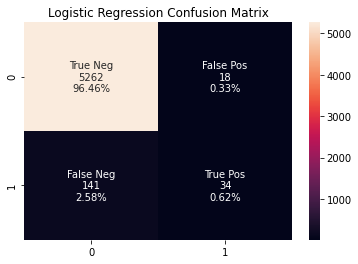

In [25]:
y_preds = lr.predict(X_train)
lr_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in lr_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in lr_matrix.flatten()/np.sum(lr_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(lr_matrix, annot=labels, fmt='')
plt.title('Logistic Regression Confusion Matrix')
plt.show()

In [26]:
lr_f1 = f1_score(y_train, y_preds, average='weighted')
print('Logistic Regression: F1_Score=%.3f' % (lr_f1))

Logistic Regression: F1_Score=0.963


#### Logistic regression has a high accuracy score and a low precision score. This is likely due to the small number of defaulted banks in the data set. This is reinforced by the 96% F1 score.

# Naive Bayes

In [27]:
cv = cross_val_score(GNB,X_train, y_train,cv=10)
print(cv)
print(cv.mean())

[0.1025641  0.09340659 0.15018315 0.11904762 0.18315018 0.12477064
 0.12293578 0.13394495 0.14678899 0.09908257]
0.1275874584131465


In [28]:
# predict probabilities for logistic regression
gnb_probs = GNB.predict_proba(X_train)
# keep probabilities for the positive outcome only
gnb_probs = gnb_probs[:,1]
# calculate scores
gnb_auc = roc_auc_score(y_train, gnb_probs)
gnb_fpr, gnb_tpr, _ = roc_curve(y_train, gnb_probs)

Random Classifier: ROC AUC=0.500
Naive Bayes: ROC AUC=0.674


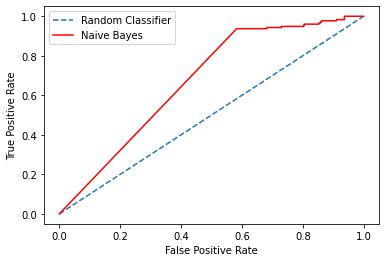

In [29]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Naive Bayes: ROC AUC=%.3f' % (gnb_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(gnb_fpr, gnb_tpr, marker='', label='Naive Bayes', color = 'r')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

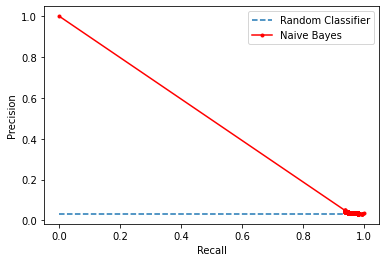

Naive Bayes: PR AUC=0.495


In [30]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, gnb_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Naive Bayes', color = 'r')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
gnb_pr_score = auc(recall, precision)
print('Naive Bayes: PR AUC=%.3f' % (gnb_pr_score))

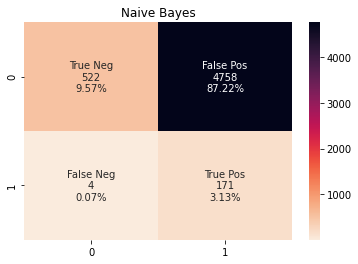

In [31]:
y_preds = GNB.predict(X_train)
gnb_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in gnb_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in gnb_matrix.flatten()/np.sum(gnb_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(gnb_matrix, annot=labels, fmt='', cmap='rocket_r')
plt.title('Naive Bayes')
plt.show()

In [32]:
gnb_f1 = f1_score(y_train, y_preds, average='weighted')
print('Naive Bayes: F1_Score=%.3f' % (gnb_f1))

Naive Bayes: F1_Score=0.176


#### Naive Bayes performs the worst amongst the models. The accuracy scores only perform slightly better than a random classifier. The low F1 score highlights a distinction in performance between recall and precision.

# Support Vector Machine

In [33]:
cv = cross_val_score(SVM,X_train,y_train,cv=10)
print(cv)
print(cv.mean())

[0.96703297 0.96703297 0.96703297 0.96703297 0.96703297 0.96880734
 0.96880734 0.96880734 0.96880734 0.96880734]
0.9679201532412541


In [34]:
#Create hyperparemeters
param_grid = {'C': [0.1, 1], 
              'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
              'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
              } 
  
grid = GridSearchCV(SVC(), param_grid, cv = 10, verbose = 3)
grid.fit(X_train, y_train)

Fitting 10 folds for each of 40 candidates, totalling 400 fits
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   0.5s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   1 out of   1 | elapsed:    0.4s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................


[Parallel(n_jobs=1)]: Done   2 out of   2 | elapsed:    1.7s remaining:    0.0s


[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   0.9s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   1.2s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.967, total=   0.7s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.969, total=   1.1s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] ....... C=0.1, gamma=1, kernel=linear, score=0.971, total=   0.6s
[CV] C=0.1, gamma=1, kernel=linear ...................................
[CV] .

[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.969, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] ........ C=0.1, gamma=0.1, kernel=rbf, score=0.969, total=   0.5s
[CV] C=0.1, gamma=0.1, kernel=rbf ....................................
[CV] .

[CV] ... C=0.1, gamma=0.01, kernel=sigmoid, score=0.969, total=   0.1s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.967, total=   0.5s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.967, total=   1.3s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.971, total=   0.6s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.969, total=   0.9s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.967, total=   1.2s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] ... C=0.1, gamma=0.001, kernel=linear, score=0.969, total=   0.7s
[CV] C=0.1, gamma=0.001, kernel=linear ...............................
[CV] .

[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.969, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=poly ................................
[CV] .... C=0.1, gamma=0.0001, kernel=poly, score=0.969, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] ..... C=0.1, gamma=0.0001, kernel=rbf, score=0.967, total=   0.1s
[CV] C=0.1, gamma=0.0001, kernel=rbf .................................
[CV] .

[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.939, total=   0.2s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.941, total=   0.2s
[CV] C=1, gamma=1, kernel=sigmoid ....................................
[CV] ........ C=1, gamma=1, kernel=sigmoid, score=0.941, total=   0.2s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.967, total=   2.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.967, total=   5.6s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.971, total=   3.8s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] ....... C=1, gamma=0.1, kernel=linear, score=0.969, total=   4.5s
[CV] C=1, gamma=0.1, kernel=linear ...................................
[CV] .

[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.969, total=   0.2s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.963, total=   0.2s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.965, total=   0.2s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.967, total=   0.2s
[CV] C=1, gamma=0.01, kernel=poly ....................................
[CV] ........ C=1, gamma=0.01, kernel=poly, score=0.969, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.967, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] ......... C=1, gamma=0.01, kernel=rbf, score=0.967, total=   0.2s
[CV] C=1, gamma=0.01, kernel=rbf .....................................
[CV] .

[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.969, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.967, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.969, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.967, total=   0.1s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.969, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.969, total=   0.2s
[CV] C=1, gamma=0.001, kernel=sigmoid ................................
[CV] .... C=1, gamma=0.001, kernel=sigmoid, score=0.969, total=   0.2s
[CV] C=1, gamma=0.0001, kernel=linear ................................
[CV] .

[Parallel(n_jobs=1)]: Done 400 out of 400 | elapsed:  6.4min finished


GridSearchCV(cv=10, estimator=SVC(),
             param_grid={'C': [0.1, 1], 'gamma': [1, 0.1, 0.01, 0.001, 0.0001],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             verbose=3)

In [35]:
# print how the model looks after hyper-parameter tuning
print(grid.best_estimator_)

SVC(C=1, gamma=0.001, kernel='poly')


In [36]:
grid_predictions = grid.predict(X_test)
  
# print classification report
print(classification_report(y_test, grid_predictions))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98      1319
           1       0.00      0.00      0.00        45

    accuracy                           0.97      1364
   macro avg       0.48      0.50      0.49      1364
weighted avg       0.94      0.97      0.95      1364



In [40]:
#use best estimator for classification
SVM = SVC(C=1, gamma=0.001, kernel='poly', probability = True)
SVM.fit(X_train, y_train)

SVC(C=1, gamma=0.001, kernel='poly', probability=True)

In [41]:
# predict probabilities for logistic regression
svm_probs = SVM.predict_proba(X_train)
# keep probabilities for the positive outcome only
svm_probs = svm_probs[:,1]
# calculate scores
svm_auc = roc_auc_score(y_train, svm_probs)
svm_fpr, svm_tpr, _ = roc_curve(y_train, svm_probs)

Random Classifier: ROC AUC=0.500
Support Vector Machine: ROC AUC=0.854


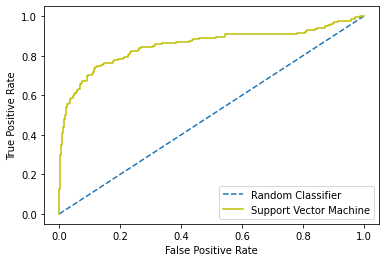

In [42]:
print('Random Classifier: ROC AUC=%.3f' % (rnd_auc))
print('Support Vector Machine: ROC AUC=%.3f' % (svm_auc))
# plot the roc curve for the model
plt.plot(rnd_fpr, rnd_tpr, linestyle='--', label='Random Classifier')
plt.plot(svm_fpr, svm_tpr, marker='', label='Support Vector Machine', color = 'y')
# axis labels
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
# show the legend
plt.legend()
# show the plot
plt.show()

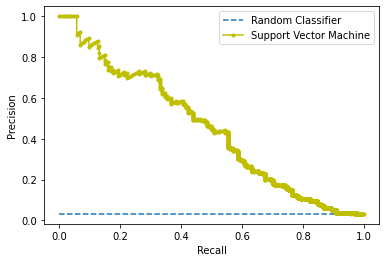

Support Vector Machine: PR AUC=0.450


In [43]:
# plot the random classifier precision-recall curve
plt.plot([0, 1], [rnd, rnd], linestyle='--', label='Random Classifier')
# calculate model precision-recall curve
precision, recall, _ = precision_recall_curve(y_train, svm_probs)
# plot the model precision-recall curve
plt.plot(recall, precision, marker='.', label='Support Vector Machine', color = 'y')
# axis labels
plt.xlabel('Recall')
plt.ylabel('Precision')
# show the legend
plt.legend()
# show the plot
plt.show()
svm_pr_score = auc(recall, precision)
print('Support Vector Machine: PR AUC=%.3f' % (svm_pr_score))

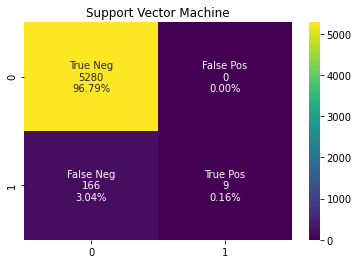

In [44]:
y_preds = SVM.predict(X_train)
svm_matrix = confusion_matrix(y_train, y_preds)
group_names = ['True Neg','False Pos','False Neg','True Pos']
group_counts = ["{0:0.0f}".format(value) for value in svm_matrix.flatten()]
group_percentages = ["{0:.2%}".format(value) for value in svm_matrix.flatten()/np.sum(svm_matrix)]
labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in zip(group_names,group_counts,group_percentages)]
labels = np.asarray(labels).reshape(2,2)
sns.heatmap(svm_matrix, annot=labels, fmt='', cmap='viridis')
plt.title('Support Vector Machine')
plt.show()

In [45]:
svm_f1 = f1_score(y_train, y_preds, average='weighted')
print('Support Vector Machine: F1_Score=%.3f' % (svm_f1))

Support Vector Machine: F1_Score=0.956


#### The support vector machine has the highest precision score amongst the models. The F1 score is only slightly smaller than logistic regression. This indicates that the model is performing well as a classifier. 